# 1. Import and Install Dependecies

In [2]:
!pip install tensorflow opencv-python mediapipe scikit-learn matplotlib


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# import tensorflow as tf
# print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

In [3]:
# print(tf.__version__)

In [3]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [4]:
mp_holistic = mp.solutions.holistic # the Holistic model, used to make detections
mp_drawing = mp.solutions.drawing_utils # drawing utilities, draw detections

In [5]:
def mediapipe_detection(image, model):
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # color conversion
	image.flags.writeable = False # img no longer writeable
	results = model.process(image) # actually detecting using MP, img will be frame from opencv
	image.flags.writeable = True # img now writeable
	image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # color conversion
	return image, results

In [6]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS) # Draw face connections, last parameter is connection
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [6]:
# mp_drawing.draw_landmarks??
# landmark_drawing_spec: wt format we'd like to apply to the dots
# connection_drawing_spec: wt format we'd like to apply to the connections

In [42]:
# mp_holistic.POSE_CONNECTIONS

In [7]:
def draw_styled_landmarks(image, results):
    # draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), # bgr, color landmark
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1) # color connection
                             ) 
    # draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [8]:
# make sure can access webcam using opencv
cap = cv2.VideoCapture(0) #grab video device 0 and it shd be webcam -accessing webcam
# set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened(): # loop thru all the frames in our camera
    	# read feed
    	# return value, frame = img from webcam
        ret, frame = cap.read() # read current frame from webcam at a certain pt of time
    	# will look like a video when stacked tgt
    
        # make detections
        image, results = mediapipe_detection(frame, holistic)
        # print(results)

        # draw landmarks
        draw_styled_landmarks(image, results) # landmarks show in real time

    	# show to screen
        cv2.imshow('OpenCV Feed', image)
    	
    	# break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'): # if curr key = q
            break
    cap.release() # release window
    cv2.destroyAllWindows() # close frame

C:\Users\moniq\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


In [52]:
# len(results.left_hand_landmarks.landmark)

21

In [53]:
# results

mediapipe.python.solution_base.SolutionOutputs

In [31]:
# frame # last frame extracted from webcam

In [9]:
draw_styled_landmarks(frame, results) # draw_landmarks x return img but applies landmark visualizations to curr img in place

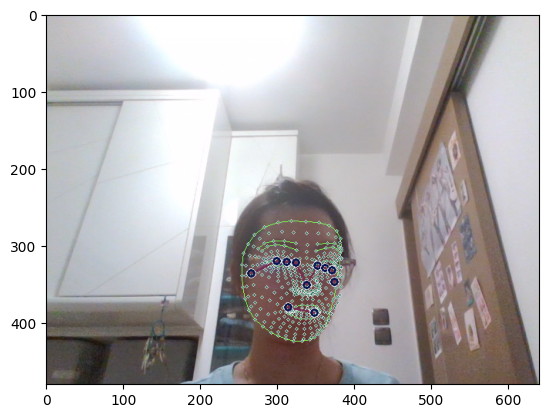

In [10]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [11]:
# results.pose_landmarks.landmark[0].x
len(results.pose_landmarks.landmark)

33

In [12]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [13]:
# test # one set of landmarks for one of our keypoints
# len(pose) 
# now we can work with each landmark
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
# same as above but list comprehension and flattened - all landmarks in just one big array

lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)

rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)


In [14]:
# pose.shape
pose

array([ 5.92622757e-01,  6.20860040e-01, -1.07556891e+00,  9.99454618e-01,
        6.04440749e-01,  5.64338982e-01, -1.00494540e+00,  9.98947442e-01,
        6.17694736e-01,  5.67519069e-01, -1.00532424e+00,  9.99013782e-01,
        6.30905509e-01,  5.71613133e-01, -1.00544155e+00,  9.98815298e-01,
        5.57877183e-01,  5.61507642e-01, -1.02668405e+00,  9.99113917e-01,
        5.37566304e-01,  5.63867748e-01, -1.02637172e+00,  9.99253809e-01,
        5.20102978e-01,  5.67863107e-01, -1.02694249e+00,  9.99242127e-01,
        6.42081976e-01,  6.03332281e-01, -5.68226099e-01,  9.98652637e-01,
        4.89035845e-01,  6.06154144e-01, -6.54768527e-01,  9.99444425e-01,
        6.15283370e-01,  6.85896933e-01, -9.10459161e-01,  9.99418497e-01,
        5.63233733e-01,  6.94035292e-01, -9.35203373e-01,  9.99645770e-01,
        7.58848906e-01,  9.25638199e-01, -2.83749342e-01,  9.91986573e-01,
        3.52492690e-01,  9.53066289e-01, -4.45713818e-01,  9.93539572e-01,
        8.65987897e-01,  

In [127]:
# results.left_hand_landmarks # returns none if can't detect left hand
# results.left_hand_landmarks.landmark # returns 3 vals: x, y, z if can detect

In [15]:
lh

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [16]:
rh

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [129]:
# len(results.left_hand_landmarks.landmark) * 3 # returns 21
# 21 * 3 = 63 we need a blank array of 63 vals if we can't detect hands

In [130]:
# np.zeros(21*3).shape

In [131]:
# len(results.face_landmarks.landmark) * 3 # x, y, z

In [17]:
face

array([ 0.58729464,  0.68872702, -0.02691118, ...,  0.64027637,
        0.56992543,  0.02945175])

In [18]:
face.shape

(1404,)

In [14]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [15]:
# extract_keypoints(results).shape
# extract_keypoints(results)[:-10]
result_test = extract_keypoints(results)

In [16]:
result_test

array([ 0.52945411,  0.73185223, -0.82538795, ...,  0.        ,
        0.        ,  0.        ])

In [21]:
# 468*3+33*4+21*3+21*3

In [17]:
# saving ea frame as a numpy array
np.save('0', result_test) 

In [18]:
np.load('0.npy')

array([ 0.52945411,  0.73185223, -0.82538795, ...,  0.        ,
        0.        ,  0.        ])

# 4. Set Up Folders for Collection

In [19]:
# path for exported data, which are numpy arrays from extract_keypoints func
DATA_PATH = os.path.join('MP_Data')

# actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# 30 frames, 30 diff sets of keypoints/ 30 diff frames of data = 30*1662 to classify that action

# collect 30 seqs ~30 videos worth of data per action
no_sequences = 30

# vids will be 30 frames in length
sequence_length = 30

# total collecting 30 videos *30 frames ea vid *3 actions *1662 keypoints

In [ ]:
# hello
## 0
## 1
## 2
## ...
## 29
# thanks

# I love you

In [20]:
# create one folder for ea action
# a subfolder 0, 1..., 29 for ea seq/ vid of actions
# ea subfolder stores ea one of the 30 frames
# will skip if they alr exist

for action in actions:
	for sequence in range(no_sequences):
		try:
			os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
		except:
			pass

# 5. Collect Keypoint Values for Training and Testing

collection breaks
hving breaks btn ea seq collection allows you to reset & reposition yourself to collect the data- action from start to finish

In [62]:
# make sure can access webcam using opencv
cap = cv2.VideoCapture(0) #grab video device 0 and it shd be webcam -accessing webcam
# set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:

    # NEW loop
    # loop thru actions
    for action in actions:
        # loop thru seqs aka vids
        for sequence in range(no_sequences):
            # loop thru vid len aka seq len; 30 frames of keypoints per video
            for frame_num in range(sequence_length):
                
                # read feed
                # return value, frame = img from webcam
                ret, frame = cap.read() # read current frame from webcam at a certain pt of time
            	# will look like a video when stacked tgt
            
                # make detections
                image, results = mediapipe_detection(frame, holistic)
                # print(results)
        
                # draw landmarks
                draw_styled_landmarks(image, results) # landmarks show in real time

                # NEW apply wait logic
                if frame_num == 0: # take a 2s break if frame num is 0
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
        
                	# show to screen
                    cv2.imshow('OpenCV Feed', image)

                # NEW export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num)) # where we're saving the frame
                np.save(npy_path, keypoints)
    	
            	# break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'): # if curr key = q
                    break
    
    cap.release() # release window
    cv2.destroyAllWindows() # close frame

C:\Users\moniq\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


In [ ]:
# cap.release()
# cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [22]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [23]:
label_map = {label:num for num, label in enumerate(actions)}

In [24]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [63]:
sequences, labels = [], [] # sequences represent feature/x data, labels = labels/ y data
for action in actions:
    for sequence in range(no_sequences):
        window = [] # for all the frames we have for that particular seq
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num))) 
            window.append(res) # grab frame 0, 1...29, add it to the window				
        sequences.append(window) # video 1... now done, add it to seq; sequences will hv 90 (30*3) diff videos, ea one will hv 30 frames ea
        labels.append(label_map[action])

In [64]:
sequences

[[array([ 0.57615244,  0.65127456, -0.79835159, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.53560483,  0.60901058, -0.78544074, ...,  0.36867183,
          0.76870847, -0.0719116 ]),
  array([ 0.5277949 ,  0.60509735, -0.77734196, ...,  0.37451947,
          0.77862895, -0.10549175]),
  array([ 0.52124149,  0.60030925, -0.76454628, ...,  0.46684685,
          0.73660523, -0.05575064]),
  array([ 0.51441348,  0.60033029, -0.7299189 , ...,  0.48083499,
          0.72168976, -0.04452807]),
  array([ 0.52117693,  0.60151923, -0.69361401, ...,  0.50492281,
          0.6883809 , -0.03926515]),
  array([ 0.5246532 ,  0.60224521, -0.74858785, ...,  0.50923097,
          0.68545377, -0.04250318]),
  array([ 0.52539527,  0.60339814, -0.72289759, ...,  0.51479304,
          0.68082303, -0.04042391]),
  array([ 0.52767903,  0.60416263, -0.72635663, ...,  0.51612151,
          0.68118978, -0.04155173]),
  array([ 0.52829319,  0.60483325, -0.7541948 , ...,  0.51649094,
       

In [65]:
np.array(sequences).shape #(90, 30, 1662)

(90, 30, 1662)

In [66]:
np.array(labels).shape

(90,)

In [67]:
X = np.array(sequences)

In [68]:
X.shape

(90, 30, 1662)

In [69]:
y = to_categorical(labels).astype(int)

In [70]:
y # labels: 0...1...2...

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05) # test will be 5% of our data

In [72]:
X_train.shape #(85, 30, 1662)

(85, 30, 1662)

In [73]:
X_test.shape #(5, 30, 1662)

(5, 30, 1662)

In [74]:
y_train.shape #(85, 3)

(85, 3)

In [75]:
y_test.shape

(5, 3)

# 7. Build and Train LSTM Neural Network

The Sequential API is the simplest and most straightforward way to build neural networks in TensorFlow. It allows you to create models layer by layer, where each layer is added in sequence. 

Sequential groups a linear stack of layers into a Model.

LSTM (Long Short-Term Memory) layers, which are well-suited for processing sequential data like video frames.

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense # gives us a temporal component for building NN & perform action detection; dense = normal fully connected layer
from tensorflow.keras.callbacks import TensorBoard # allows logging, trace & monitor our model

In [76]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir) # TensorBoard to monitor NN training & accuracy

In [109]:
model = Sequential()
# 64 LSTM units
# when using tensorflow with a LSTM layer, stack them tgt, need to return the seqs since next layer will need those; input_shape is 30 frames per prediction multiplied by 1662
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
# not return seq when next layer is a dense layer
model.add(LSTM(64, return_sequences=False, activation='relu'))
# fully connected layers
model.add(Dense(64, activation='relu')) # 64 fully connected neurons
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [78]:
actions.shape[0]

3

In [79]:
res = [.7, 0.2, 0.1]

In [80]:
actions[np.argmax(res)]

'hello'

In [110]:
# play ard to get Adam as optimizer; when we hv a multi-class classification model, the loss function has to be categorical_crossentropy; 
# when we hv a binary classification model, use binary cross entropy; if performing regression with NN, then use sth like mean squared error; 
# metrics part is optional but we can track accuracy as we train
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [82]:
# fit & train model
# 2000 epochs may be a bit high for training with such a low amount of data; can stop training early if accuracy is acceptable & loss has stopped consistently decreasing
model.fit(X_train, y_train, epochs=200, callbacks=[tb_callback])

Epoch 1/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 88ms/step - categorical_accuracy: 0.3542 - loss: 1.2579
Epoch 2/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - categorical_accuracy: 0.3229 - loss: 3.2639
Epoch 3/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - categorical_accuracy: 0.4324 - loss: 10.3867
Epoch 4/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - categorical_accuracy: 0.3776 - loss: 5.7188
Epoch 5/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - categorical_accuracy: 0.3914 - loss: 18.2120
Epoch 6/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - categorical_accuracy: 0.3346 - loss: 48.8898
Epoch 7/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - categorical_accuracy: 0.3601 - loss: 26.2092
Epoch 8/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - categorical_accuracy: 0.3170 - loss: 53.2607
Epoch 9/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - categorical_accuracy: 0.3053 - loss: 15.6597
Epoch 10/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - categorical_accuracy: 0.3758 - loss: 7.8381
Epoch 11/200
3/3 ━━━━━━━━━━━━━━━

In [83]:
model.summary()
# reasonably small # of parameters that we need

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 30, 64)              │         442,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 30, 128)             │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,790,027 (6.83 MB)

 Trainable params: 596,675 (2.28 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,193,352 (4.55 MB)

# 8. Make Predictions

In [84]:
res = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 956ms/step


In [85]:
np.sum(res[0])

1.0

In [86]:
actions[np.argmax(res[0])] 

'thanks'

In [87]:
actions[np.argmax(y_test[0])]

'thanks'

In [99]:
actions[np.argmax(res[3])]

'thanks'

In [100]:
actions[np.argmax(y_test[3])]

'thanks'

# 9. Save Weights

In [106]:
model.save('action.h5')

In [107]:
del model # then run model & compile cells again

In [111]:
model.load_weights('action.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [112]:
# gives us a confusion matrix for each diff label, give us what's being detected as true pos, false pos...
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [125]:
yhat = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


In [126]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [127]:
yhat

[1, 1, 1, 1, 1]

In [128]:
ytrue

[1, 0, 1, 1, 0]

In [129]:
multilabel_confusion_matrix(ytrue, yhat) 
# we want all the numbers to be in top left (true neg) or bottom right corners (true pos)

array([[[3, 0],
        [2, 0]],

       [[0, 2],
        [0, 3]]], dtype=int64)

In [130]:
# multilabel_confusion_matrix??

In [131]:
accuracy_score(ytrue, yhat) # 1.0 means 100% accuracy on our test set

0.6

# 11. Test in Real Time

In [ ]:
# 1. NEW detection variables
sequence = [] # for collecting 30 frames
sentence = []
threshold = 0.8

# make sure can access webcam using opencv
cap = cv2.VideoCapture(0) #grab video device 0 and it shd be webcam -accessing webcam
# set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened(): # loop thru all the frames in our camera
    	# read feed
    	# return value, frame = img from webcam
        ret, frame = cap.read() # read current frame from webcam at a certain pt of time
    	# will look like a video when stacked tgt
    
        # make detections
        image, results = mediapipe_detection(frame, holistic)
        # print(results)

        # draw landmarks
        draw_styled_landmarks(image, results) # landmarks show in real time

         # 2. NEW Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:] # grab last 30 frames
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])

        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # NEW Visualization probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

    	# show to screen
        cv2.imshow('OpenCV Feed', image)
    	
    	# break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'): # if curr key = q
            break
    cap.release() # release window
    cv2.destroyAllWindows() # close frame

In [ ]:
model.predict(X_test)

In [ ]:
model.predict(X_test[0])

In [ ]:
X_test[0].shape # (30, 1662) but shape our model is expecting is (num_sequences=1,30,1662)

In [ ]:
np.expand_dims(X_test[0], axis=0).shape

In [ ]:
model.predict(np.expand_dims(X_test[0], axis=0)) # can pass one seq at a time, rather than a bunch